# Final Project Submission


* Student name: Stephen Ndirangu
* Student pace: part time
* Scheduled project review date/time: 16/4/2023
* Instructor name: Everlyn Asiko
* Blog post URL: https://github.com/SteveNdirangu/dsc-phase-1-project-v2-4

### Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

### This analysis is to help reveal insights for Microsoft's new movie studio.The point of interest is which movies are doing well currently in the box office. 

### This analysis will focus on ratings and revenue of the movies as the relevant information

## 1) Importing relevant Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

## 2) Loading the Datasets

### We start with the Sql dataset from IMDB

In [2]:
conn = sqlite3.connect("zippedData/im.db")
cur=conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables= cur.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

#### We read the Sql tables we need, and join them to create one dataset

In [3]:
imdb_df = pd.read_sql("""SELECT * FROM movie_basics  JOIN movie_ratings USING(movie_id);""", conn)

In [4]:
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [5]:
tn_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)

# 3) Cleaning the first Dataset

In [6]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [7]:
imdb_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [8]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
imdb_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


The dataset contains movies since 2010 to 2019

Average runtime is 94 minutes with some outliers for example 51,420 minutes

average ratings are 6.3 and ratings go from 1 to 10

In [10]:
dup_vals= imdb_df.duplicated().any().sum()
print("There are {} duplicates in this dataset".format(dup_vals))

There are 0 duplicates in this dataset


In [11]:
imdb_df.loc[imdb_df["runtime_minutes"]>180]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
60,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6
64,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010,181.0,"Drama,History,War",4.1,3907
260,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
776,tt10244756,Ang hupa,Ang hupa,2019,276.0,Sci-Fi,7.2,5
1052,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,"Biography,Documentary,Music",8.2,9372
...,...,...,...,...,...,...,...,...
72452,tt9055926,National Theatre Live: King Lear,National Theatre Live: King Lear,2018,227.0,Drama,8.6,135
72572,tt9097864,My Thesis Film: A Thesis Film by Erik Anderson,My Thesis Film: A Thesis Film by Erik Anderson,2018,233.0,Drama,8.4,5
73022,tt9318514,Reason,Vivek,2018,261.0,Documentary,9.0,44
73388,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632


In [12]:
# imdb_df.groupby("genres")["averagerating"].mean().sort_values().tail(20)

In [13]:
imdb_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [14]:
imdb_df["genres"].fillna("missing", inplace=True)

Now to deal with the runtime values that are null

In [15]:
imdb_df.dropna(inplace=True)

In [16]:
imdb_df = imdb_df.rename(columns={'primary_title': 'movie'})

In [17]:
imdb_df = imdb_df.rename(columns={'start_year': 'year'})

In [18]:
imdb_df.set_index("movie", inplace=True)

In [19]:
imdb_df.drop(columns=["movie_id","original_title"], inplace=True)

In [20]:
imdb_df

,year,runtime_minutes,genres,averagerating,numvotes
movie,,,,,
Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,2018,122.0,Drama,6.9,4517
The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...
Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
Swarm Season,2019,86.0,Documentary,6.2,5
Diabolik sono io,2019,75.0,Documentary,6.2,6


## 4) Cleaning the second Dataset

In [21]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [23]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [24]:
bom_df[bom_df["foreign_gross"].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [25]:
# percentage of missing values in columns
bom_df.isna().sum()/bom_df.shape[0]*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [26]:
# foreign gross has 39% missing values, we can drop it
bom_df.drop(columns=["foreign_gross"], inplace=True)

In [27]:
bom_df = bom_df.rename(columns={'title': 'movie'})


In [28]:
bom_df.set_index("movie", inplace=True)

In [29]:
bom_df.dropna(inplace=True)

In [30]:
bom_df

,studio,domestic_gross,year
movie,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...
The Quake,Magn.,6200.0,2018
Edward II (2018 re-release),FM,4800.0,2018
El Pacto,Sony,2500.0,2018


# 5) Cleaning The Third dataset

In [31]:
tn_df.head(8)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"


In [32]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


This dataset has no missing values,but the values of money are not in the correct format, so we will change them to the correct type...numerical

We strip the dollar signs and the commas first

In [33]:

tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '').str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')


we then change the type of data for the columns

In [34]:
tn_df["domestic_gross"]=pd.to_numeric(tn_df["domestic_gross"])
tn_df["production_budget"]=pd.to_numeric(tn_df["production_budget"])
tn_df["worldwide_gross"]=pd.to_numeric(tn_df["worldwide_gross"])
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


Now we can set the movie's name as the index

In [35]:
tn_df.set_index("movie", inplace=True)

In [36]:
tn_df['year'] = tn_df['release_date'].dt.year

In [37]:
tn_df

,release_date,production_budget,domestic_gross,worldwide_gross,year
movie,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017
...,...,...,...,...,...
Red 11,2018-12-31,7000,0,0,2018
Following,1999-04-02,6000,48482,240495,1999
Return to the Land of Wonders,2005-07-13,5000,1338,1338,2005


# 6) Combining the Datasets

### First, i will reset the index so as to merge

In [51]:
imdb_df.reset_index(inplace=True)
bom_df.reset_index(inplace=True)
tn_df.reset_index(inplace=True)

### Chaining together the merge

In [56]:
merged_df = imdb_df.merge(bom_df, on=['movie', 'year']).merge(tn_df, on=['movie', 'year'])

In [58]:
merged_df

,movie,year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,release_date,production_budget,domestic_gross_y,worldwide_gross
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013-12-25,91000000,58236838,187861183
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014-09-19,28000000,26017685,62108587
2,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015-06-12,215000000,652270625,1648854864
3,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,2011-10-28,45000000,13109815,21544732
4,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,2012-04-13,30000000,44338224,54052249
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000.0,2018-03-23,5000000,17547999,25529498
1035,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000.0,2018-11-16,48000000,67363237,119736188
1036,The Great Wall,2017,72.0,Documentary,6.5,24,Uni.,45500000.0,2017-02-17,150000000,45157105,334486852
1037,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,2018-06-08,10000000,44069456,70133905


In [109]:
merged_df.columns

Index(['movie', 'year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'studio', 'domestic_gross_x', 'release_date',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [149]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1038
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1039 non-null   object        
 1   year               1039 non-null   int64         
 2   runtime_minutes    1039 non-null   float64       
 3   genres             1039 non-null   object        
 4   averagerating      1039 non-null   float64       
 5   numvotes           1039 non-null   int64         
 6   studio             1039 non-null   object        
 7   domestic_gross_x   1039 non-null   float64       
 8   release_date       1039 non-null   datetime64[ns]
 9   production_budget  1039 non-null   int64         
 10  domestic_gross_y   1039 non-null   int64         
 11  worldwide_gross    1039 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 145.5+ KB


### Extracting  the month so that we can create groupings based on the year, and each month

In [184]:
#we create a column for the extracted month
merged_df['month'] = merged_df['release_date'].dt.month 
grouped_df = merged_df.groupby(['year', 'month'])["worldwide_gross"].mean()

In [181]:
merged_df

,movie,year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,release_date,production_budget,domestic_gross_y,worldwide_gross,month
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013-12-25,91000000,58236838,187861183,12
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014-09-19,28000000,26017685,62108587,9
2,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015-06-12,215000000,652270625,1648854864,6
3,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,2011-10-28,45000000,13109815,21544732,10
4,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,2012-04-13,30000000,44338224,54052249,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000.0,2018-03-23,5000000,17547999,25529498,3
1035,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000.0,2018-11-16,48000000,67363237,119736188,11
1036,The Great Wall,2017,72.0,Documentary,6.5,24,Uni.,45500000.0,2017-02-17,150000000,45157105,334486852,2
1037,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,2018-06-08,10000000,44069456,70133905,6


### This data now shows each year, and each month, with the mean gross worldwide

In [183]:
grouped_df.head(30)

year  month
2010  1        6.885591e+07
      2        1.399410e+08
      3        1.012614e+08
      4        4.936259e+07
      5        2.378730e+08
      6        2.233880e+08
      7        2.205927e+08
      8        9.288672e+07
      9        8.209742e+07
      10       4.784011e+07
      11       1.163128e+08
      12       1.249881e+08
2011  1        1.189247e+08
      2        7.267380e+07
      3        9.607406e+07
      4        1.655081e+08
      5        2.880511e+08
      6        3.042299e+08
      7        1.188380e+08
      8        1.013905e+08
      9        4.651884e+07
      10       1.087665e+08
      11       1.051226e+08
      12       1.865594e+08
2012  1        6.626224e+07
      2        1.427703e+08
      3        2.523166e+08
      4        8.493019e+07
      5        1.552604e+08
      6        2.296121e+08
Name: worldwide_gross, dtype: float64

### check the distribution of the last 5 years' average world wide grosses per month

# 7) Visualizing the data

### Lets check the rating versus the Gross worldwide, and Domestic gross

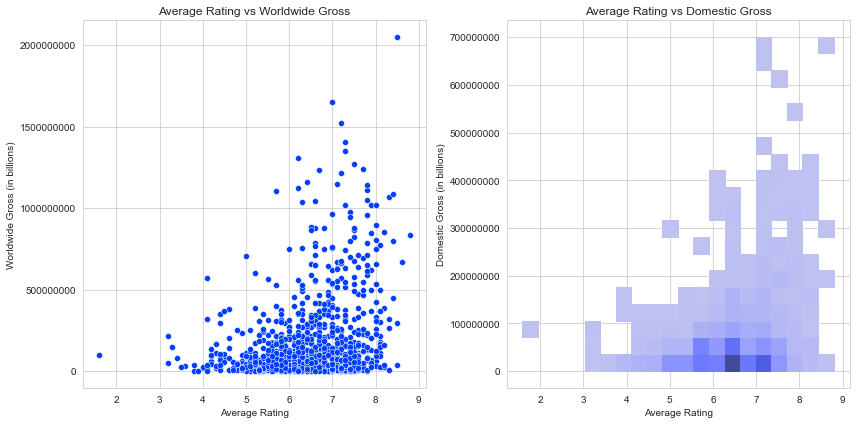

In [123]:
# Set figure size
plt.figure(figsize=(12, 6))

# First plot: scatter plot of rating vs worldwide gross
plt.subplot(1, 2, 1)
sns.scatterplot(x='averagerating', y='worldwide_gross', data=merged_df)
plt.title('Average Rating vs Worldwide Gross')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross (in billions)')
plt.ticklabel_format(style='plain', axis='y')

# Second plot: histogram of rating vs domestic gross
plt.subplot(1, 2, 2)
sns.histplot(x='averagerating', y='domestic_gross_y', data=merged_df, bins=20)
plt.title('Average Rating vs Domestic Gross')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross (in billions)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()



Similar trends for both

## Checking whether Production Budget has a relation with the worldwide gross

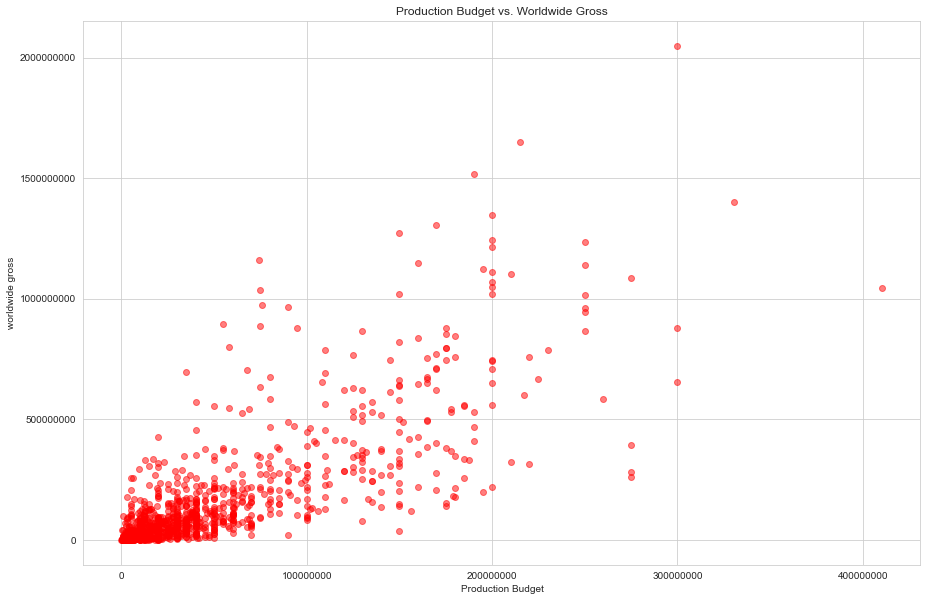

In [135]:
plt.figure(figsize=(15,10))
plt.scatter(merged_df['production_budget'], merged_df['worldwide_gross'], alpha=0.5, color="red")
plt.ticklabel_format(style='plain', axis='both')
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('worldwide gross')
plt.show()


though more expensive movies are rare, the trend is: the more budget, the more gross

### Production Budget versus Average Rating, with worldwide Gross size

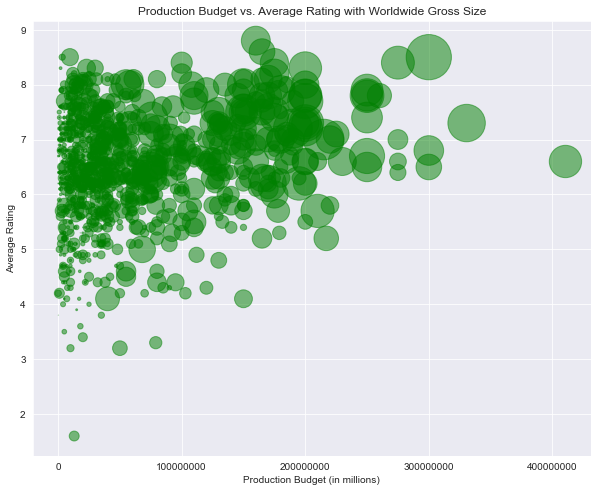

In [186]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain', axis='x')
plt.scatter(merged_df['production_budget'], merged_df['averagerating'], s=merged_df['worldwide_gross']/1000000, alpha=0.5, color="green")
plt.title('Production Budget vs. Average Rating with Worldwide Gross Size')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Average Rating')
plt.show()


### Lets check the Genres that are popular in rating and those with good returns in the box office

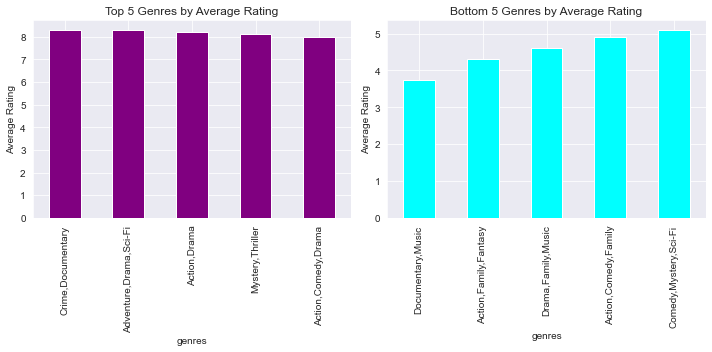

In [187]:
# Grouping by genre and calculate mean rating
genre_ratings = merged_df.groupby('genres')['averagerating'].mean()

# Sorting by rating and get top/bottom 5 genres
top_genres = genre_ratings.sort_values(ascending=False)[:5]
bottom_genres = genre_ratings.sort_values()[:5]

#bar plot
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax1, ax2 = axes

top_genres.plot(kind='bar', ax=ax1, color="purple")
ax1.set_title('Top 5 Genres by Average Rating')
ax1.set_ylabel('Average Rating')

bottom_genres.plot(kind='bar', ax=ax2, color="cyan")
ax2.set_title('Bottom 5 Genres by Average Rating')
ax2.set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


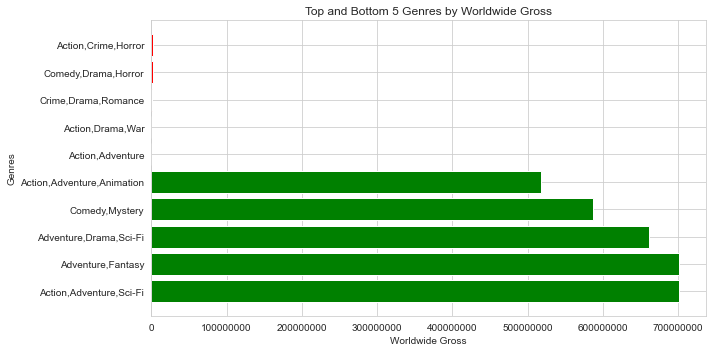

In [134]:
genre_gross = merged_df.groupby('genres')['worldwide_gross'].mean()

# Sort the values in descending order and get the top and bottom 5
top5_gross = genre_gross.sort_values(ascending=False)[:5]
bottom5_gross = genre_gross.sort_values()[:5]

# Creating a horizontal bar plot of the top 5 and bottom 5 genres
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.barh(top5_gross.index, top5_gross.values, color='green')
plt.barh(bottom5_gross.index, bottom5_gross.values, color='red')
plt.title('Top and Bottom 5 Genres by Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


### Lets compare rating to runtime

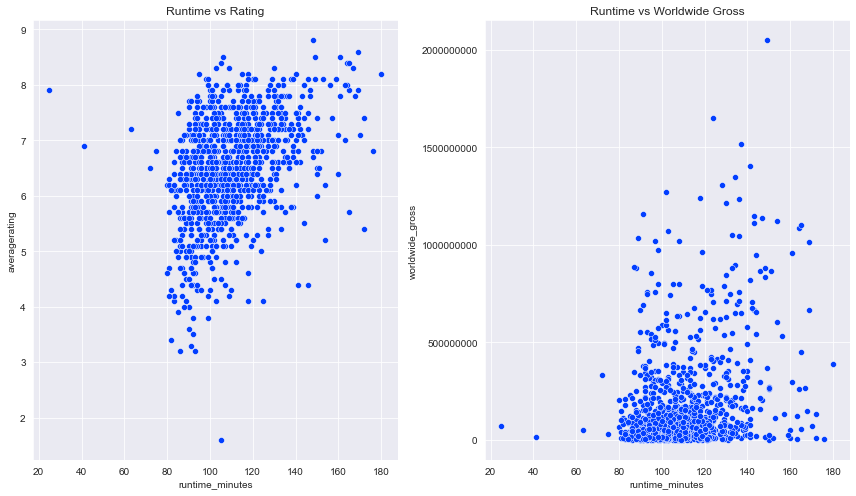

In [148]:
# Set plot size
plt.figure(figsize=(12, 7))

# Plot the first graph
plt.subplot(1, 2, 1)
sns.scatterplot(x='runtime_minutes', y='averagerating', data=merged_df)
plt.title('Runtime vs Rating')
plt.ticklabel_format(style='plain', axis='both')
# Plot the second graph
plt.subplot(1, 2, 2)
sns.scatterplot(x='runtime_minutes', y='worldwide_gross', data=merged_df)
plt.title('Runtime vs Worldwide Gross')
plt.ticklabel_format(style='plain', axis='both')
# Display the plot
plt.tight_layout()
plt.show()


### check the distribution of the last 5 years' average world wide grosses per month

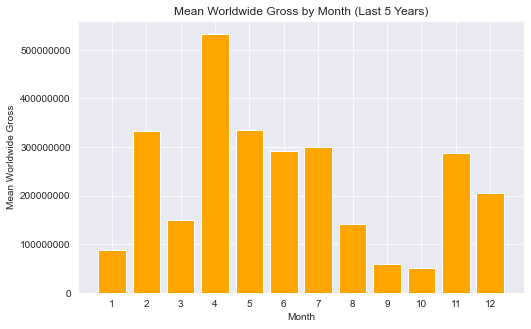

In [170]:
# group by year and month
grouped_df = merged_df.groupby([merged_df['release_date'].dt.year.rename('year'), merged_df['release_date'].dt.month.rename('month')])

# filter last 5 years
last_5_years = grouped_df.filter(lambda x: x['release_date'].dt.year.max() >= 2018)

# calculate mean worldwide gross for each month
monthly_mean_gross = last_5_years.groupby('month')['worldwide_gross'].mean()

# plot the data
plt.figure(figsize=(8,5))
plt.bar(monthly_mean_gross.index, monthly_mean_gross, color="Orange")
plt.title('Mean Worldwide Gross by Month (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Mean Worldwide Gross')
plt.xticks(range(1, 13))
plt.ticklabel_format(style='plain', axis='both')
plt.show()


### Checking per year

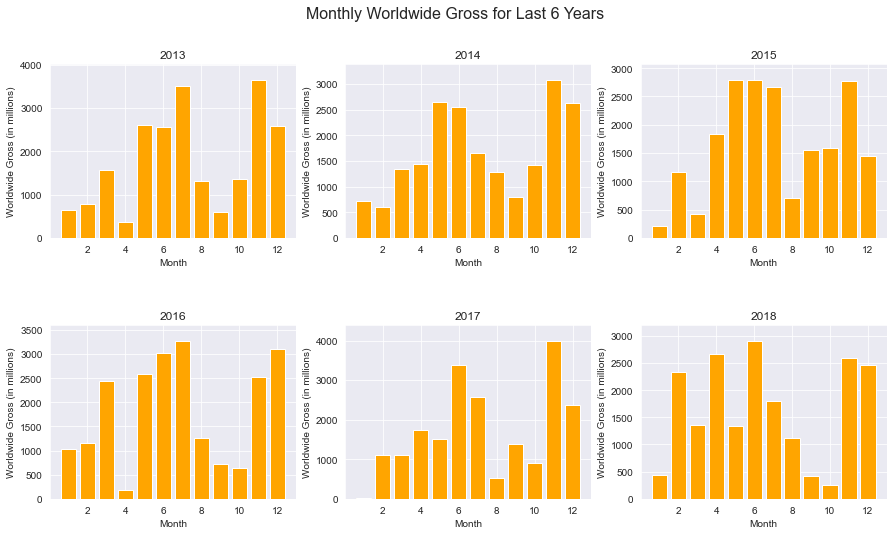

In [173]:

grouped_df = merged_df.groupby(['year', 'month']).sum().reset_index()

# Get the last 6 years
last_6_years = grouped_df['year'].unique()[-6:]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Loop through each year and plot the monthly gross
for i, year in enumerate(last_6_years):
    ax = axs[i // 3][i % 3]
    year_df = grouped_df[grouped_df['year'] == year]
    ax.bar(year_df['month'], year_df['worldwide_gross'] / 1000000, color="orange")
    ax.set_title(year)
    ax.set_xlabel('Month')
    ax.set_ylabel('Worldwide Gross (in millions)')
    ax.ticklabel_format(style='plain', axis='y')
    #the limits of y axis are from zero to the maximum gross available, the scale is then made visible 
    ax.set_ylim([0, year_df['worldwide_gross'].max() / 1000000 * 1.1])

# Set the overall title
fig.suptitle('Monthly Worldwide Gross for Last 6 Years', fontsize=16)

# Adjust the horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



### Finally, lets see the correlations

In [175]:
correlations = merged_df.corr()
correlations["averagerating"].sort_index()

averagerating        1.000000
domestic_gross_x     0.292718
domestic_gross_y     0.292750
month                0.252920
numvotes             0.517907
production_budget    0.168339
runtime_minutes      0.406148
worldwide_gross      0.278457
year                 0.024619
Name: averagerating, dtype: float64

In [176]:
correlations = merged_df.corr()
correlations["production_budget"].sort_index()

averagerating        0.168339
domestic_gross_x     0.694491
domestic_gross_y     0.694416
month               -0.041025
numvotes             0.514512
production_budget    1.000000
runtime_minutes      0.337804
worldwide_gross      0.778029
year                 0.053264
Name: production_budget, dtype: float64

In [177]:
correlations

,year,runtime_minutes,averagerating,numvotes,domestic_gross_x,production_budget,domestic_gross_y,worldwide_gross,month
year,1.000000,0.117873,0.024619,-0.092889,0.104557,0.053264,0.104553,0.116616,-0.006038
runtime_minutes,0.117873,1.000000,0.406148,0.413304,0.276495,0.337804,0.276426,0.297700,0.151590
averagerating,0.024619,0.406148,1.000000,0.517907,0.292718,0.168339,0.292750,0.278457,0.252920
numvotes,-0.092889,0.413304,0.517907,1.000000,0.637405,0.514512,0.637399,0.621866,0.048037
domestic_gross_x,0.104557,0.276495,0.292718,0.637405,1.000000,0.694491,0.999997,0.937926,-0.028107
production_budget,0.053264,0.337804,0.168339,0.514512,0.694491,1.000000,0.694416,0.778029,-0.041025
domestic_gross_y,0.104553,0.276426,0.292750,0.637399,0.999997,0.694416,1.000000,0.937880,-0.028061
worldwide_gross,0.116616,0.297700,0.278457,0.621866,0.937926,0.778029,0.937880,1.000000,-0.013143
month,-0.006038,0.151590,0.252920,0.048037,-0.028107,-0.041025,-0.028061,-0.013143,1.000000


## Findings

### Budget
The production budget has very strong positive correlation with the domestic and worldwide grosses



### Average rating
-movies rated higher did much better in the box office,both for domestic and worlwide audiences, and in fact, movies rated lower than 5 did very poor

-curiously, the rating isn't really affected by increased budget, probably due to the fact that many things go into a production

-it would seem the average rating has a weak positive correlation with both domestic and worldwide gross, 

### Genre
Generally genres dont really affect a rating, but the top 5 that make money worldwide are anything of the "adventure genre" involving scifi, animation and comedy

### Runtime
-Rating has a strong positive correlation with the runtime of the movie, but closer investigation shows the dirstibution is clustered within a value range of 80 to 140 minutes

### Month of release
-it would seem from the per-year and mean of 5 years bar plots, that in the middle of the year and in November, these are the best times to release movies

# Conlusions an Recommendations

1) Mirosoft should invest in the Genres of Adventure, with scifi,comedy,and/or animation, with main projects being of the genre "Adventure,Drama,Scifi" as it gets high reviews as well as high grossing worldwide

2) A high budget in these genres will give better returns worldwide, somewhere above the 100 million mark

3)A runtime of Between 80 minutes and 140 minutes is the most consistent at good ratings

4) Releasing between months 4-6, and at the tail end of the year might also give good worldwide grosses...probably because these are the months in which holidays occur eg easter, christmas